In [1]:
import pandas as pd
import numpy as np
titanic_df = pd.read_csv(
    "https://raw.githubusercontent.com/dlsun/data-science-book/master/data/titanic.csv"
)

titanic_df = titanic_df.drop("name", axis=1)
titanic_df = titanic_df.drop("ticket", axis=1)

# filling missing data
titanic_df["age"] = titanic_df["age"].fillna(value=titanic_df["age"].mean())



# catagorical to quantitative
catagorical_to_quantitative_maps = {}

# gender
catagorical_to_quantitative_maps["sex"] = list(titanic_df["sex"].unique())
gender_catagories = pd.DataFrame(pd.get_dummies(titanic_df["sex"]))
titanic_df = titanic_df.drop("sex", axis = 1)
titanic_df= pd.concat([titanic_df, gender_catagories], axis = 1)
   
# boat
titanic_df["boat"] = titanic_df["boat"].fillna(value="No boat")
catagorical_to_quantitative_maps["boat"] = list(titanic_df["boat"].unique())
boat_catagories = pd.DataFrame(pd.get_dummies(titanic_df["boat"]))
titanic_df = titanic_df.drop("boat", axis = 1)
titanic_df = pd.concat([titanic_df, boat_catagories], axis = 1)
# adjust a few columns to aviod running into problems when creating a column with the same name
# will need to consider this when going backwards
titanic_df["boat C"] = titanic_df["C"]
titanic_df = titanic_df.drop("C", axis=1)
catagorical_to_quantitative_maps["boat"].append("boat C")
catagorical_to_quantitative_maps["boat"].remove("C")
titanic_df["boat D"] = titanic_df["D"]
titanic_df = titanic_df.drop("D", axis=1)
catagorical_to_quantitative_maps["boat"].append("boat D")
catagorical_to_quantitative_maps["boat"].remove("D")

#cabin
catagorical_to_quantitative_maps["cabin"] = list(titanic_df["cabin"].unique())
cabins = pd.DataFrame(pd.get_dummies(titanic_df["cabin"]))
titanic_df = titanic_df.drop("cabin", axis = 1)
titanic_df = pd.concat([titanic_df, cabins], axis = 1)

#embarked
titanic_df["embarked"] = titanic_df["embarked"].fillna(value="entrance unknown")
catagorical_to_quantitative_maps["embarked"] = list(titanic_df["embarked"].unique())
entrances = pd.DataFrame(pd.get_dummies(titanic_df["embarked"]))
titanic_df = titanic_df.drop("embarked", axis = 1)
titanic_df = pd.concat([titanic_df, entrances], axis = 1)


#body
titanic_df["body"] = titanic_df["body"].fillna(value="body unknown")
catagorical_to_quantitative_maps["body"] = list(titanic_df["body"].unique())
bodies = pd.DataFrame(pd.get_dummies(titanic_df["body"]))
titanic_df = titanic_df.drop("body", axis = 1)
titanic_df = pd.concat([titanic_df, bodies], axis = 1)

#home.dest
titanic_df["home.dest"] = titanic_df["home.dest"].fillna(value="home.dest unknown")
catagorical_to_quantitative_maps["home.dest"] = list(titanic_df["home.dest"].unique())
destinations = pd.DataFrame(pd.get_dummies(titanic_df["home.dest"]))
titanic_df = titanic_df.drop("home.dest", axis = 1)
titanic_df = pd.concat([titanic_df, destinations], axis = 1)


print(titanic_df.shape)
display(titanic_df)

for col in titanic_df.columns:
    for val in titanic_df[col]:
        if type(val) != int and type(val) != float:
            print(col)
            print(val)
            print("\n")

type(titanic_df.sum().sum())

(1309, 718)


,pclass,survived,age,sibsp,parch,fare,female,male,1,10,...,"Windsor, England New York, NY","Winnipeg, MB","Winnipeg, MN","Woodford County, KY","Worcester, England","Worcester, MA","Yoevil, England / Cottage Grove, OR","Youngstown, OH","Zurich, Switzerland",home.dest unknown
0,1,1,29.000000,0,0,211.3375,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0.916700,1,2,151.5500,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,2.000000,1,2,151.5500,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,30.000000,1,2,151.5500,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,25.000000,1,2,151.5500,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,14.500000,1,0,14.4542,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1305,3,0,29.881135,1,0,14.4542,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1306,3,0,26.500000,0,0,7.2250,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1307,3,0,27.000000,0,0,7.2250,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


numpy.float64

For NMF usage, let's make this dataset non-negative

In [2]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler

n_features = 1000
signed_synth_data, labels = make_classification(n_samples=100, n_features=n_features, n_informative=3, n_classes=3)

# To Make our data non-negative, we'll scale our data with min-max scaling which puts it into the range of [0, 1]
scaler = MinMaxScaler()
synth_data = scaler.fit_transform(signed_synth_data)

y = pd.DataFrame(labels, columns=["class"]).astype(int)
X = pd.DataFrame(synth_data)
Xy = pd.concat([X, y], axis=1)

display(Xy)

/opt/conda/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:17: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, defaultdict


,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,class
0,0.359354,0.512662,0.649514,0.745019,0.497648,0.341912,0.512555,0.610363,0.221768,0.447344,...,0.379008,0.132460,0.584866,0.392528,0.526122,0.777499,0.342884,0.000000,0.528413,0
1,0.115814,0.476506,0.722420,0.420408,0.353814,0.678039,0.348182,0.597259,0.491948,0.597037,...,0.462072,0.242361,0.475041,0.757247,0.516845,0.343071,0.639570,0.828938,0.358204,2
2,0.358724,0.353969,0.810522,0.784838,0.319642,0.425821,0.725368,0.331205,0.258107,0.555835,...,0.355819,0.268010,0.435016,0.501120,0.731913,0.224088,0.331679,0.414860,0.207549,1
3,0.197597,0.501424,0.656087,0.682854,0.564272,0.084342,0.377352,0.626960,0.717017,0.439185,...,0.585243,0.668387,0.483280,0.622808,0.501133,0.334353,0.438234,0.777003,0.319258,0
4,0.460455,0.499525,0.704369,0.799418,0.151287,0.645074,0.883359,0.443114,0.533485,0.557550,...,0.400691,0.313635,0.519108,0.695983,0.373262,0.458079,0.000000,0.362474,0.502415,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.702325,0.320436,0.482554,0.599351,0.900030,0.609220,0.518699,0.604243,0.909999,0.394464,...,0.965408,0.808314,0.539922,0.505595,0.442271,0.513162,0.448789,0.417318,0.434011,1
96,0.514238,0.303566,0.816537,0.849451,0.515123,0.023858,0.558121,0.240054,0.366301,0.501794,...,0.625017,0.542760,0.148990,0.495099,0.618914,0.494831,0.118372,0.650663,0.502622,2
97,0.000000,0.382007,0.856802,0.478450,0.238494,0.204118,0.433352,0.495245,0.806520,0.591939,...,0.356491,0.446404,0.312729,0.325006,0.475036,0.685051,0.439693,0.701316,0.647524,1
98,0.467896,0.382986,0.426512,0.358556,0.105418,0.494826,0.528134,0.354215,0.410023,0.701685,...,0.570105,0.377431,0.495300,0.359512,0.684024,0.577978,0.352398,0.501687,0.673088,2


### Edit Below

In [3]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Problem: simple classifiers like linear regression handle poorly with datasets that have:
# - massive dimension (feature count) compared to sample size
# - few important features

pred_iterations = 30
mses = []
linreg_model = LinearRegression()
for _ in range(pred_iterations):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    linreg_model.fit(X_train, y_train)
    y_pred = linreg_model.predict(X_test)
    mses.append(mse(y_pred, y_test))

print('Linear Regression Avg MSE (Bad):', np.mean(mses))

Linear Regression Avg MSE (Bad): 0.6601775601464158


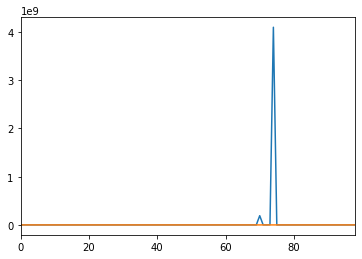

In [4]:
%matplotlib inline
from sklearn.decomposition import NMF
from sklearn.decomposition import PCA
# Solution: simple classifiers can handle these datasets better, after dimensionality reduction is applied
# If we reduce dimensions on a dataset via NMF & sklearn PCA, and then predict at each dimension drop, does lin. reg. performance increase?
min_dim = 2

dim_nmf_mses, dim_pca_mses = [], []
# Track how prediction performance differs with amount of dimensions

# for dim_num in range(100, n_features + 1):
for dim_num in range(min_dim, min(X.shape) + 1): # num of dim must be <= min dimension of our X for sklearn NMF

#     # debug print
#     print('Orig df (dim_num = ' + str(dim_num) + '):')
#     display(X)
    
    # Perform PCA and NMF on same dataset
    nmf_model = NMF(n_components=dim_num)
    X_nmftrans = pd.DataFrame(nmf_model.fit_transform(X))

#     # debug print
#     print('Dim-red df (dim_num = ' + str(dim_num) + '):')
#     display(X_nmftrans)
    
    pca_model = PCA(n_components=dim_num)
    X_pcatrans = pd.DataFrame(pca_model.fit_transform(X))
    
    nmf_mses, pca_mses = [], []
    for _ in range(pred_iterations):

        X_train, X_test, y_train, y_test = train_test_split(X_nmftrans, y)
        linreg_model.fit(X_train, y_train)
        y_pred = linreg_model.predict(X_test)
        nmf_mses.append(mse(y_pred, y_test))
        
        X_train, X_test, y_train, y_test = train_test_split(X_pcatrans, y)
        linreg_model.fit(X_train, y_train)
        y_pred = linreg_model.predict(X_test)
        pca_mses.append(mse(y_pred, y_test))

    dim_nmf_mses.append(np.mean(nmf_mses))
    dim_pca_mses.append(np.mean(pca_mses))

pd.Series(dim_nmf_mses).plot.line()
pd.Series(dim_pca_mses).plot.line()

# 

# Xy_test = abs(pd.concat([X_test, y_test], axis=1))


# nmf_preds = pd.DataFrame(W @ H)
# # getting the "y" column from the NMF prediction
# nmf_y_preds = list(nmf_preds[n_features])


# reg_model = LinearRegression().fit(X_train, y_train)
# reg_y_preds = reg_model.predict(X_test)
# # just pulling the values out since linear regression returns a list of lists
# reg_y_preds = [_[0] for _ in reg_y_preds]
# nmf_errors = []
# reg_errors = []

# y_test = list(y_test["class"])

# # getting error
# for i in range(len(reg_y_preds)):
#     reg_errors.append((y_test[i] - reg_y_preds[i]) ** 2)
#     nmf_errors.append((y_test[i] - nmf_y_preds[i]) ** 2)

# print("nmf", np.mean(nmf_errors))
# print("reg", np.mean(reg_errors))

In [36]:
# Mess around space
# # test = pd.DataFrame([[1,2,3], [2,4,5], [3,4,10]])
# test = pd.DataFrame(np.ones((300, 1000)))
# display(test)
# mdl = NMF(n_components=200)
# pd.DataFrame(mdl.fit_transform(test))


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
296,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
297,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
298,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,1.3512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.3512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.3512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.3512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.3512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.3512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
296,1.3512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
297,1.3512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
298,1.3512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Old Below

In [111]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.decomposition import NMF
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y)
# Using test data because that is what Linear_Regression will use in prediction
Xy = abs(pd.concat([X_test, y_test], axis=1))
nmf_model = NMF(n_components=2)
W = nmf_model.fit_transform(Xy)
H = nmf_model.components_
nmf_preds = pd.DataFrame(W @ H)
# getting the "y" column from the NMF prediction
nmf_y_preds = list(nmf_preds[n_features])


reg_model = LinearRegression().fit(X_train, y_train)
reg_y_preds = reg_model.predict(X_test)
# just pulling the values out since linear regression returns a list of lists
reg_y_preds = [_[0] for _ in reg_y_preds]
nmf_errors = []
reg_errors = []

y_test = list(y_test["class"])

# getting error
for i in range(len(reg_y_preds)):
    reg_errors.append((y_test[i] - reg_y_preds[i]) ** 2)
    nmf_errors.append((y_test[i] - nmf_y_preds[i]) ** 2)

print("nmf", np.mean(nmf_errors))
print("reg", np.mean(reg_errors))

nmf 0.9803111852183711
reg 0.7940561403538158


In [112]:
# A = pd.DataFrame(np.array([[1, 2, 3,], [4, 5, 6], [7, 8, 9], [0, 1, 0]]))
# A. columns = ["a", "b", "c"]
# from sklearn.decomposition import NMF
# y = A["c"]
# X = A.drop("c", axis=1)
# nmf_model = NMF()

# W = nmf_model.fit_transform(A)
# H = nmf_model.components_

# X_train, X_test, y_train, y_test = train_test_split(X, y)
# reg_model = LinearRegression().fit(X_train, y_train)

# display(A)
# preds = reg_model.predict(X_test)